##DIC Lab1 Part 2

Shefali Sharma - 50247677
Priya Murthy - 50248887



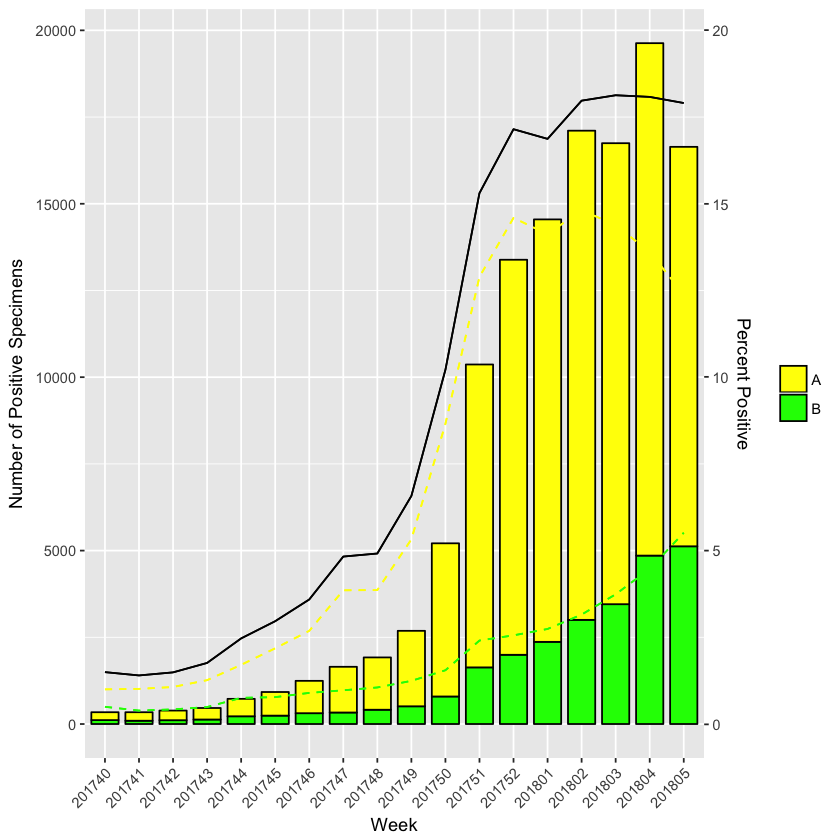

In [124]:
#Graph 1 - Barplot

#install.packages("reshape2")
#https://stackoverflow.com/questions/9531904/plot-multiple-columns-on-the-same-graph-in-r

rm(list = ls())
library(ggplot2)
library(reshape2)
data <-read.csv(file = "/Users/priyamurthy/Documents/Sem2/Data Intensive Computing/Lab1Part2/Influenza_data.csv",TRUE, sep = ",")
temp = c("Week","Percent.Positive.A","Percent.Positive.B","Total...Tested", "X..Positive")
data <- melt(data, id.vars=temp)

colors <- c("yellow", "green") 
labels <- c("A","B")
plot <- ggplot(data,aes(x =factor(Week), y = value, fill =  variable,width=0.8)) + geom_bar(stat = "identity",colour="black") + scale_fill_manual(name = " ", values = colors, labels=labels)

#To draw lines
plot <- plot+geom_line(aes(x =as.numeric(factor(data$Week)),y=data$X..Positive*680)) + geom_line(linetype = 2 , aes(x =as.numeric(factor(Week)),y=data$Percent.Positive.A*680), color= "yellow") +geom_line( linetype = 2, aes(x =as.numeric(factor(data$Week)),y=data$Percent.Positive.B*680),color = "green")
plot <- plot + scale_y_continuous(sec.axis = sec_axis(~./1000, name = "Percent Positive")) + scale_color_discrete(name = " ", labels = c("Percent Positive", "Positive FLu A", "Positive Flu B"))

plot <- plot #+ scale_colour_manual(values = c("yellow", "green"))
  plot <- plot + labs(y = "Number of Positive Specimens",
                x = "Week", legend=c("Percent Positive", "Positive FLu A", "Positive Flu B"))
  #plot <- plot + theme(legend.position = c(0.8, 0.9))

plot + theme(axis.text.x = element_text(angle = 45, hjust = 1))


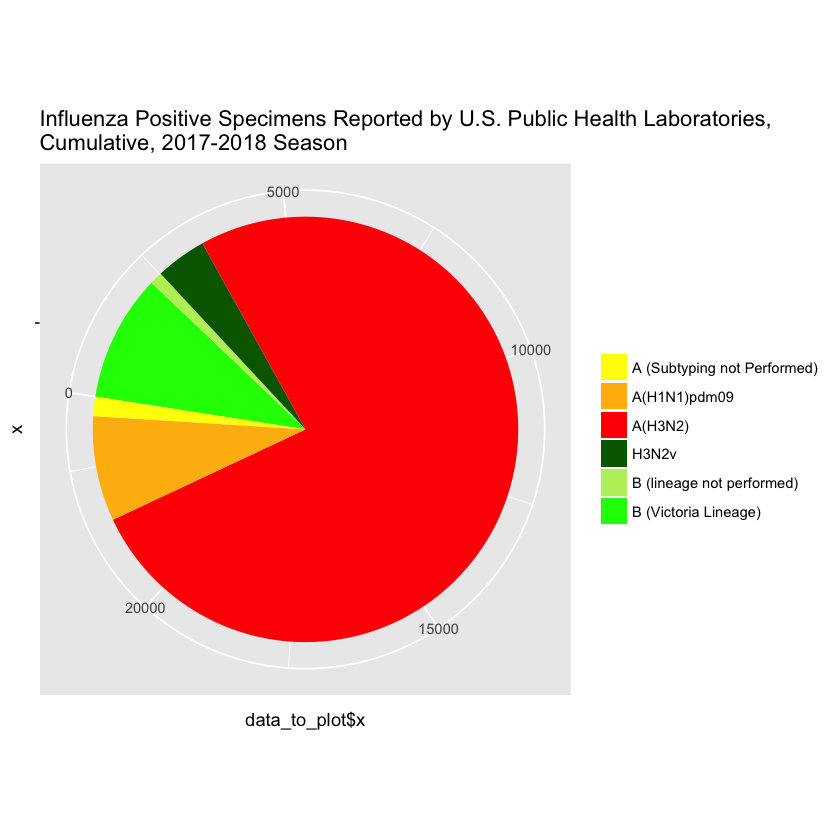

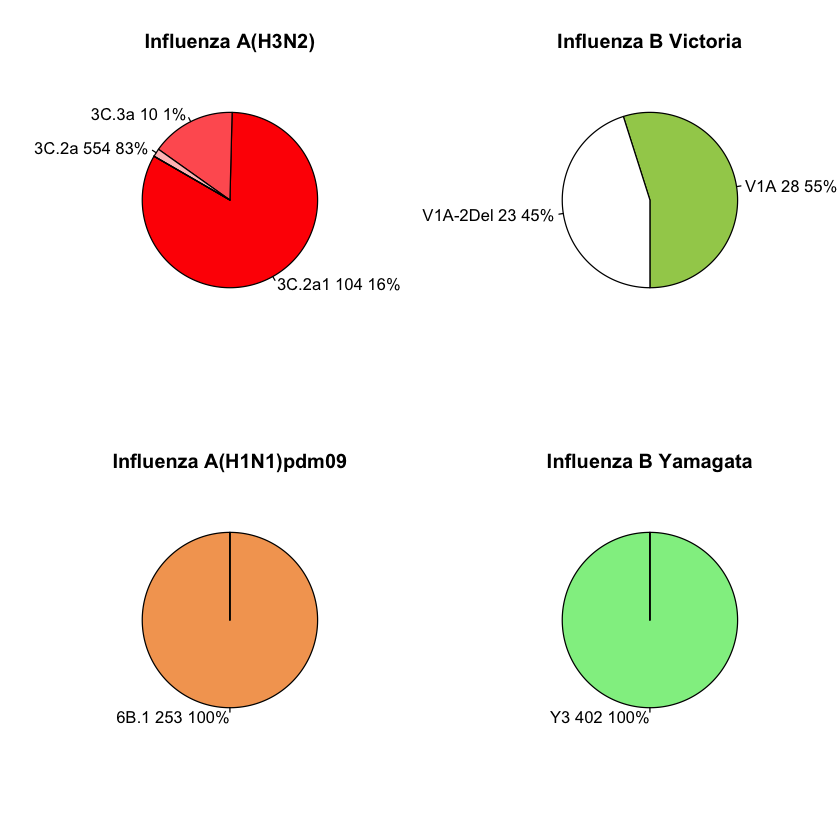

In [122]:
#Graph 2 - Pie Chart

#https://www.cdc.gov/flu/weekly/
#https://www.tutorialgateway.org/pie-chart-in-r-programming/
#install.packages("ggrepel")
library(ggrepel)
rm(list=ls())

data_test <-read.csv(file = "/Users/priyamurthy/Documents/Sem2/Data Intensive Computing/Lab1Part2/Genetic04.csv",TRUE, sep = ",")


par(mfrow=c(2,2))

data_another_pie <- read.csv(file = "/Users/priyamurthy/Documents/Sem2/Data Intensive Computing/Lab1Part2/StackedBarPlotData.csv",TRUE, sep = ",")

data_another_pie <- data_another_pie[,-10]
data_another_pie <- data_another_pie[,-9]
data_another_pie <- data_another_pie[,-5]
data_another_pie <- melt(data_another_pie, id.vars="Week")
data_to_plot <- aggregate(data_another_pie$value , by=list(Category=data_another_pie$variable), FUN=sum)

labels = c(1,2,3,4,5,6)
bp<- ggplot(data_to_plot, aes(x="", y=data_to_plot$x, fill=data_to_plot$Category)) +
  geom_bar(width = 1, stat = "identity") 
pie <- bp + coord_polar("y", start=30) + scale_fill_manual(name = " ",values = c("yellow", "darkgoldenrod1" , "red", "darkgreen", "darkolivegreen2","green") , labels = c('A (Subtyping not Performed)', 'A(H1N1)pdm09', 'A(H3N2)', 'H3N2v', 'B (lineage not performed)', 'B (Victoria Lineage)', 'B (Yamagata Lineage)')) 
pie <- pie + labs(title = "Influenza Positive Specimens Reported by U.S. Public Health Laboratories, 
Cumulative, 2017-2018 Season") 
pie


par(mfrow=c(2,2))
df <- data.frame(data_test)
g1 <- df[data_test$X.Sub.type == "H3",]
l1 = c("3C.2a1 104 16%","3C.3a 10 1%", "3C.2a 554 83%")
cols <- colorRampPalette(c("red", "rosybrown1"))(3) 
pie(g1$Number,labels = l1,col = cols, , init.angle = 90 + 60, main = "Influenza A(H3N2)")

g2 <- df[data_test$X.Sub.type == "B/Victoria",]
l2 = c("V1A 28 55%", "V1A-2Del 23 45%")
c2 = c("darkolivegreen3", "white")
d2 = c(0,30)
pie(g2$Number,labels = l2,col = c2, init.angle = 270,  main = "Influenza B Victoria")

g3 <- df[data_test$X.Sub.type == "H1pdm09",]
l3 = c("6B.1 253 100%")
c3 = c("sandybrown")
pie(g3$Number,labels = l3,col = c3, init.angle = 90, main = "Influenza A(H1N1)pdm09")


g4 <- df[data_test$X.Sub.type == "B/Yamagata",]
l4 = c("Y3 402 100%")
c4 = c("lightgreen")
pie(g4$Number,labels = l4,col = c4, init.angle = 90 , main = "Influenza B Yamagata")






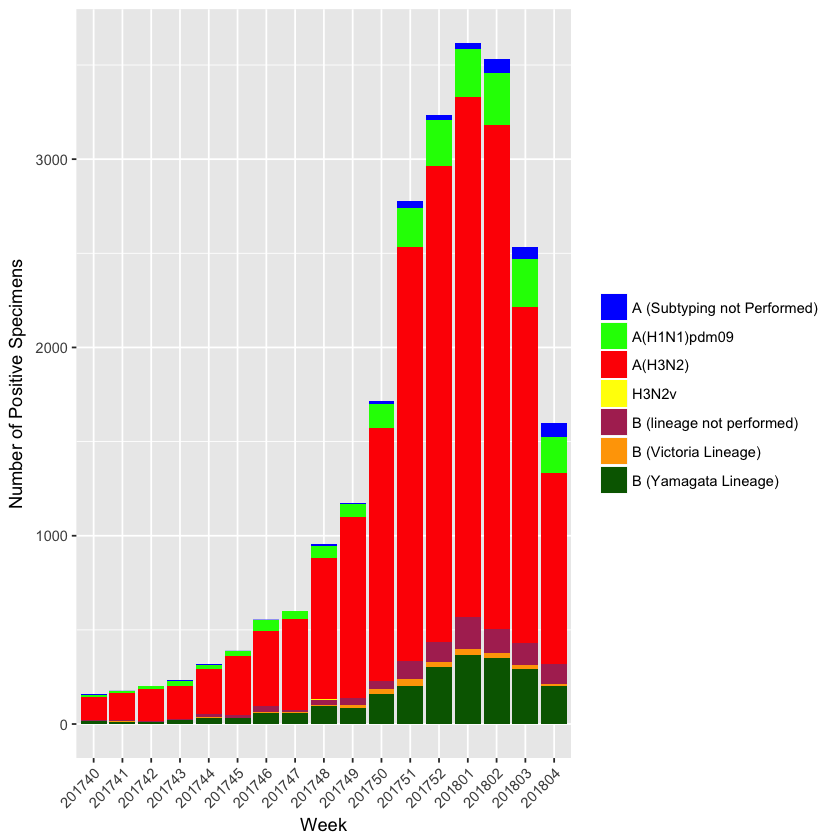

In [57]:
rm(list=ls())
library(ggplot2)
#install.packages("ggthemes")
library(ggthemes)
#install.packages("extrafont")
library(extrafont)
#install.packages("plyr")
library(plyr)
#install.packages("scales")
#library(scales)
library(reshape2)
data_test <-read.csv(file = "/Users/priyamurthy/Documents/Sem2/Data Intensive Computing/Lab1Part2/StackedBarPlotData.csv",TRUE, sep = ",")

data_test <- data_test[,-10]
data_test <- data_test[,-9]
data_test <- melt(data_test, id.vars="Week")
p4 <- ggplot() + geom_bar(aes(y = data_test$value, x = factor(data_test$Week), fill =  variable), data = data_test,
                          stat="identity") +theme(axis.text.x = element_text(angle = 45, hjust = 1)) + labs(x = "Week", y= "Number of Positive Specimens" , colour = " ") 
p4 <- p4 +  scale_fill_manual(name = '', guide = 'legend',labels = c('A (Subtyping not Performed)', 'A(H1N1)pdm09', 'A(H3N2)', 'H3N2v', 'B (lineage not performed)', 'B (Victoria Lineage)', 'B (Yamagata Lineage)'), values = c("blue","green","red", "yellow", "maroon", "orange", "darkgreen")) 
  
p4

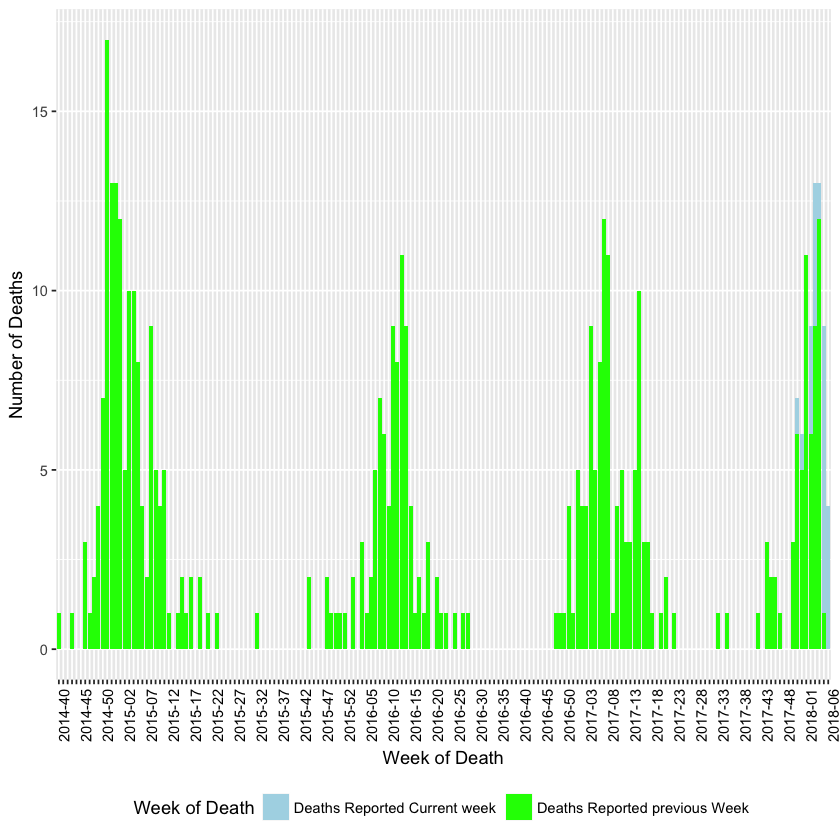

In [53]:
rm(list=ls())
#install.packages("reshape")
library(reshape)
library(ggplot2)
data_to_plot <-read.csv(file = "/Users/priyamurthy/Documents/Sem2/Data Intensive Computing/Lab1Part2/PedFluDeath_WeeklyData.csv",TRUE, sep = ",")
data_to_plot <- data_to_plot[,-1]
data_to_plot <- melt(data_to_plot, id.vars="WEEK.NUMBER")



plot <- ggplot() + geom_bar(aes(y = data_to_plot$value, x = factor(data_to_plot$WEEK.NUMBER), fill =  variable), data = data_to_plot,
stat="identity") +theme(axis.text.x=element_text(color=c("black","transparent","transparent","transparent","transparent"),angle = 90, hjust = 1), legend.position="bottom") + labs(x = "Week of Death", y= "Number of Deaths", color = " ")+ scale_fill_manual(name = 'Week of Death', guide = 'legend',labels = c('Deaths Reported Current week', 'Deaths Reported previous Week'), values = c("lightblue",  "green")) 

plot

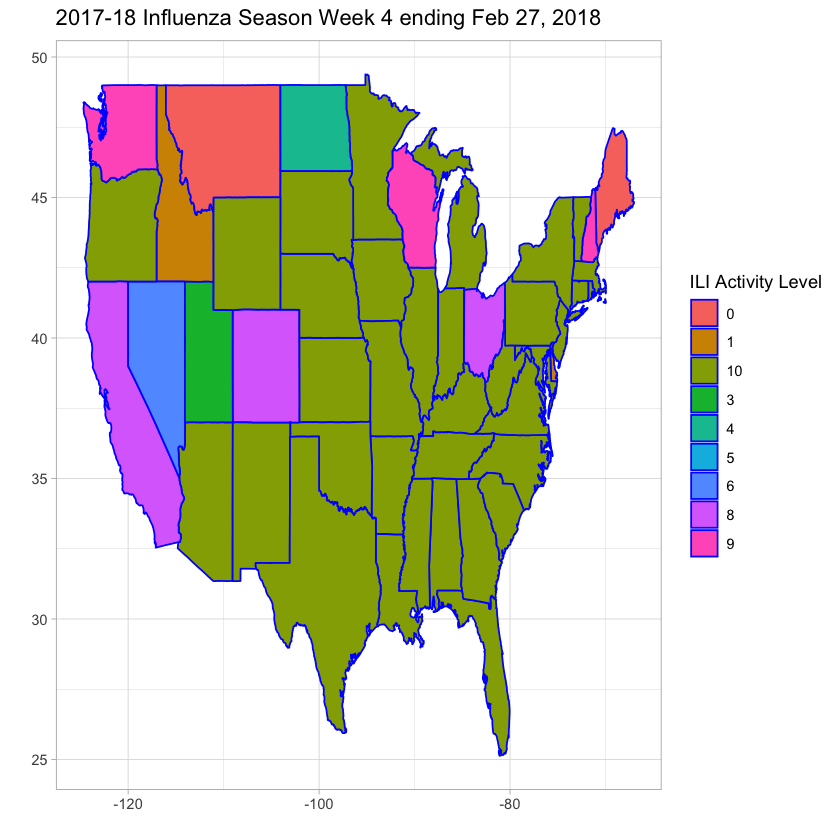

In [103]:
#https://uchicagoconsulting.wordpress.com/tag/r-ggplot2-maps-visualization/

rm(list=ls())
library(ggplot2)
#install.packages("maps")
library(maps)
library(ggmap)

data_map <-read.csv(file = "/Users/priyamurthy/Documents/Sem2/Data Intensive Computing/Lab1Part2/StateDatabyWeekforMap_2017-18week3-4.csv",TRUE, sep = ",")

data_map$STATENAME = tolower(data_map$STATENAME)

colnames(data_map)[colnames(data_map)=="STATENAME"] <- "region"

data_map$ACTIVITY.LEVEL <- gsub("Level*", "\\1", data_map$ACTIVITY.LEVEL)
states <- map_data("state")

map.df <- merge(data_map,states, by="region", all.x=T)



p <- ggplot()
p <- p + geom_polygon( data=map.df, aes(x=long, y=lat, group = group, fill= map.df$ACTIVITY.LEVEL),colour="blue" ) + 
    labs(fill = "ILI Activity Level", title = "2017-18 Influenza Season Week 4 ending Feb 27, 2018", x = "", y = "") + theme_light()

p